In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import scipy.stats
from scipy.stats import norm
from sklearn.linear_model import LogisticRegression
from tqdm.auto import tqdm
import time
import scipy.linalg as scilinalg
import seaborn as sns
from scipy.stats import ortho_group
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import multiprocessing as mp
from joblib import Parallel, delayed
from utils import *

from conf_simu import *

np.random.seed(1234)

In [2]:
def simu_hetero(d1,d2,alpha,het,sd,tail,pr,k_star,rk,M_mean,mis_set,kap,sigma_true=False,plot=False,full_exp=False):
    M_star, A, P = gen_(d1,d2,het,sd,tail,pr,M_mean,mis_set,k_star)
    return cfmc_simu_hetero(alpha,rk,A,M_star,P,het,kap,sigma_true,plot,full_exp=full_exp)

In [5]:
d1 = d2 = 500
alpha = 0.1
sd = 1
het = 'logis1' # 'homo' | 'logis' | 'rank1'
pr = 0.8
rk = 30
M_mean = 5
mis_set = 5
kap = 1
k_star = 8
sigma_true=False
full_exp = False
tail = 'het1'
res = simu_hetero(d1,d2,alpha,het,sd,tail,pr,k_star,rk,M_mean,mis_set,kap,sigma_true,plot=True,full_exp=full_exp)
print(res)

iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
(0.898754711579751, 0.8990409847798082, 4.8934, 4.8683)


[0, 'gaussian', 1]
[0, 'gaussian', 1]
[0, 'gaussian', 1]
[0, 'gaussian', 1]
[0, 'gaussian', 1]


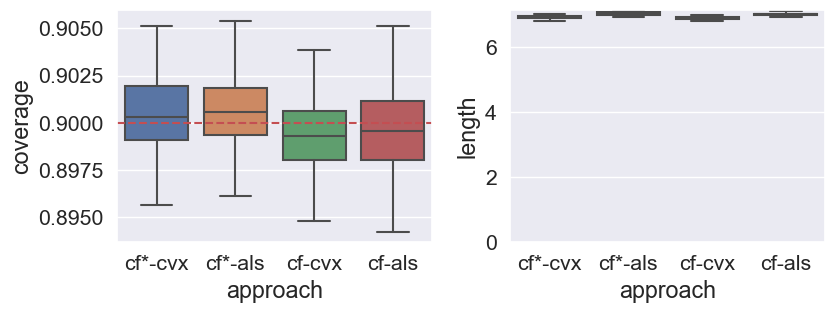

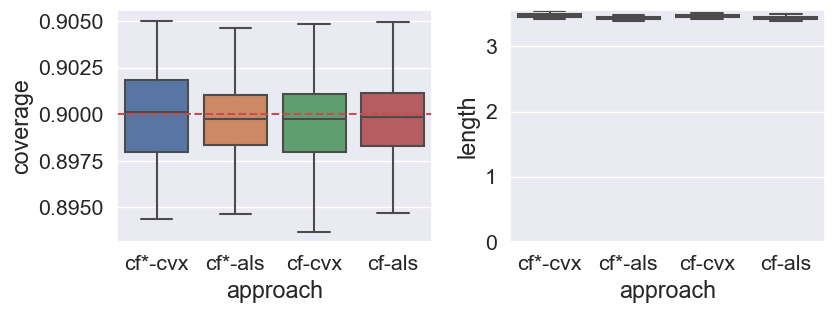

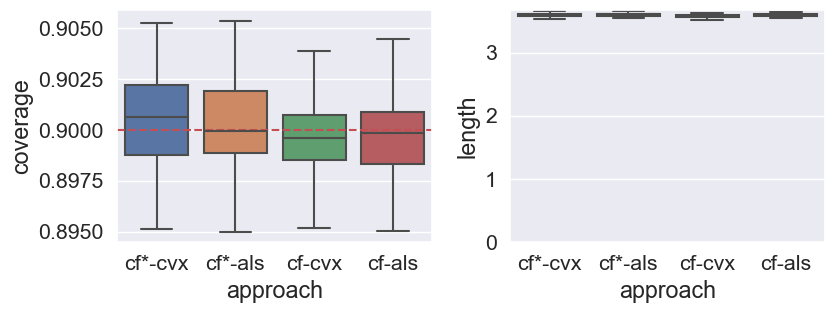

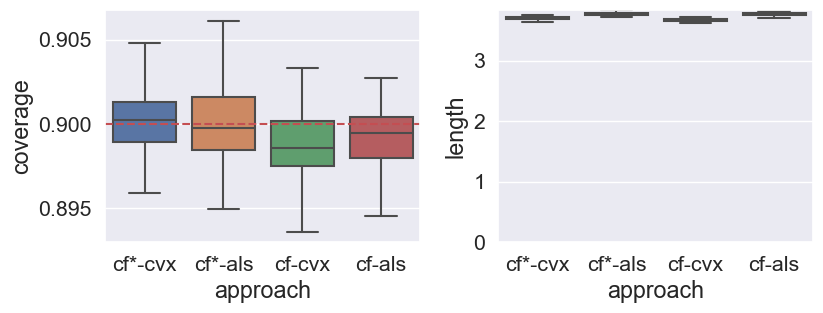

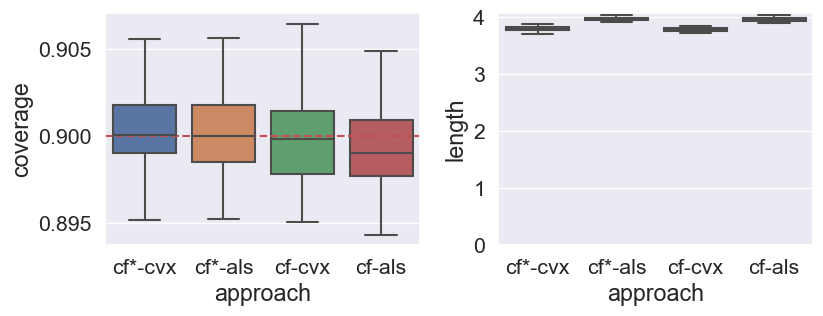

iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
ite

iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
ite

iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
ite

iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
ite

iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
ite

iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
ite

iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
ite

iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
Function value changing by less than progTol
iter: 1
iter: 2
ite

In [4]:
# repeated
# remember to disable plotting
alpha = 0.1
sd0 = 1
base1 = 'cvx'
base2 = base = 'als'
repN = 100
pr = 0.8
M_mean = 2
kap = 1
k_star = 8
tail = 'gaussian'
sigma_true=False
full_exp=True
num_cores = mp.cpu_count()
if full_exp:
    rk_seq = range(4,24,4)
else:
    rk_seq = range(2,41,2)

for d in [500]:
    d1 = d2 = d
    for het in ['logis1']:
        for mis_set in [0]:
            for rk in rk_seq:
                if mis_set==2:
                    pr = 0.2
                else:
                    pr = 0.8
                if mis_set==3:
                    tail='cauchy'
                    sd = 0.05
                elif mis_set==4:
                    tail='het'
                    sd = sd0
                elif mis_set==5:
                    tail='het1'
                    sd=sd0
                else:
                    tail='gaussian'
                    sd = sd0
                print([mis_set, tail, sd])
                if __name__ == "__main__":
                    results = Parallel(n_jobs=num_cores)(delayed(simu_hetero)(d1,d2,alpha,het,sd,tail,pr,k_star,rk,M_mean,mis_set,kap,sigma_true,full_exp=full_exp) for i in range(repN))
                results = np.array(results)

                if full_exp:
                    res_mat = results.reshape(repN,8)

                    cov_rt_cvx = res_mat[:,0]
                    cov_rt_als = res_mat[:,1]
                    cov_rt_cvx_hat = res_mat[:,2]
                    cov_rt_als_hat = res_mat[:,3]
                    cov_ = np.hstack((cov_rt_cvx, cov_rt_als))
                    cov_ = np.hstack((cov_,cov_rt_cvx_hat))
                    cov_ = np.hstack((cov_,cov_rt_als_hat))
                    len_ave_cvx = res_mat[:,4]
                    len_ave_als = res_mat[:,5]
                    len_ave_cvx_hat = res_mat[:,6]
                    len_ave_als_hat = res_mat[:,7]
                    len_ = np.hstack((len_ave_cvx, len_ave_als))
                    len_ = np.hstack((len_,len_ave_cvx_hat))
                    len_ = np.hstack((len_,len_ave_als_hat))

                    label1 = 'cf*-'+base1
                    label2 = 'cf*-'+base2
                    label3 = 'cf-'+base1
                    label4 = 'cf-'+base2
                    nam_ = [label1]*repN + [label2]*repN + [label3]*repN + [label4]*repN
                    cov_df = pd.DataFrame(cov_, columns=['coverage'])
                    len_df = pd.DataFrame(len_, columns=['length'])
                    cov_df['approach'] = nam_
                    len_df['approach'] = nam_

                else:
                    res_mat = results.reshape(repN,4)

                    cov_rt_als = res_mat[:,0]
                    cov_rt_als_hat = res_mat[:,1]
                    cov_ = np.hstack((cov_rt_als, cov_rt_als_hat))
                    len_ave_als = res_mat[:,2]
                    len_ave_als_hat = res_mat[:,3]
                    len_ = np.hstack((len_ave_als, len_ave_als_hat))

                    label1 = 'cf*-'+base2
                    label2 = 'cf-'+base2
                    nam_ = [label1]*repN + [label2]*repN 
                    cov_df = pd.DataFrame(cov_, columns=['coverage'])
                    len_df = pd.DataFrame(len_, columns=['length'])
                    cov_df['approach'] = nam_
                    len_df['approach'] = nam_

                file_dir1 = '../results/hetero_cov_'+str(d1)+'_'+str(mis_set)+'_'+str(k_star)+'_'+str(rk)+'_'+het+'_'+str(sd)+'_'+tail+'_'+str(sigma_true)+'_'+str(full_exp)+'.csv'
                file_dir2 = '../results/hetero_len_'+str(d1)+'_'+str(mis_set)+'_'+str(k_star)+'_'+str(rk)+'_'+het+'_'+str(sd)+'_'+tail+'_'+str(sigma_true)+'_'+str(full_exp)+'.csv'
                cov_df.to_csv(file_dir1, index=False)
                len_df.to_csv(file_dir2, index=False)

                fig, ax = plt.subplots(ncols=2,figsize=(8,3))     
                fig.tight_layout(pad=0.6)
                sns.set(font_scale = 1.4)

                sns.boxplot(ax=ax[0], data=cov_df, y="coverage", x="approach",showfliers = False)
                ax[0].axhline(y = 1-alpha, color = 'r', linestyle = '--')

                sns.boxplot(ax=ax[1], data=len_df, y="length", x="approach",showfliers = False)

                ax[1].set_ylim(0,max(len_df['length']))

                plot_dir = '../plots/hetero_'+str(alpha)+'_'+str(d1)+'_'+str(mis_set)+'_'+str(k_star)+'_'+str(rk)+'_'+het+'_'+str(sd)+'_'+tail+'_'+str(pr)+'_'+str(sigma_true)+'_'+str(full_exp)+'.pdf'
                plt.savefig(plot_dir, bbox_inches='tight')



In [6]:
A = np.array([[1],[2],[3]])
B = np.random.randn(9).reshape((3,3))
A*B

array([[ 0.47143516, -1.19097569,  1.43270697],
       [-0.62530379, -1.44117747,  1.77432588],
       [ 2.57876524, -1.90957051,  0.04708912]])